In [ ]:
import numpy as np
import ROOT

In [ ]:
f = ROOT.TFile("2020_Co_coin.root")

In [ ]:
f.ls()

In [ ]:
h1_adc0 = f.Get('h1_adc0')
h1_adc1 = f.Get('h1_adc1')
h2_adc = f.Get('h2_adc')
h1_sca = f.Get('h1_sca')

In [ ]:
c = ROOT.TCanvas('c','',400,400)

In [ ]:
h1_adc0.Draw()
c.Draw()

In [ ]:
h1_adc1.Draw()
c.Draw()

In [ ]:
h2_adc.Draw('colz')
c.Draw()

In [ ]:
h1_sca.Draw()
c.Draw()

In [ ]:
t = f.Get('raw_data')

In [ ]:
t.Print()

あとは`C++ROOT`と同様にループ回すことができる。

In [ ]:
hh = ROOT.TH1F('hh','',2000,0,2000)
n = t.GetEntries()
print(n)
for i in range(n):
    t.GetEntry(i)
    if (500<t.adc1<800) and t.adc0>300:
        hh.Fill(t.adc0)
        

In [ ]:
hh.Draw()
c.Draw()

In [ ]:
from scipy.special import erfc
import math

def func(x, p):
    g0 = p[0]*np.exp(-(x[0]-p[1])**2/2/p[2]**2) 
    g1 = p[3]*np.exp(-(x[0]-p[4])**2/2/p[5]**2) 
    a1 = 0.5*(p[6]*(x[0]**2+p[9]**2)+p[7]*x[0]+p[8])
    b1 = -(p[9]/np.sqrt(2*math.pi))*p[6]*(x[0]+p[10])+p[7]
    c1 = a1*erfc((x[0]-p[10])/np.sqrt(2)/p[9])+b1*np.exp(-(x[0]-p[10])**2/2/p[9]**2)
    return g0+g1+c1
    

In [ ]:
import numpy as np
fun = ROOT.TF1('fun',func,200,1400,11)
par = np.array([400,1100,20,300,1180,20,0.001,-1,350,100,800])
[fun.SetParameter(i,par[i]) for i in range(11)]
fun.SetParLimits(0,0,600)
fun.SetParLimits(1,1000,1150)
fun.SetParLimits(3,0,600)
fun.SetParLimits(4,1150,1250)

In [ ]:
hh.Fit(fun,'S','',300,1400)
# hh.Fit('pol2','S','',300,700)

In [ ]:
hh.Draw()
c.Draw()

# コンプトン端のエネルギーの計算

In [ ]:
energies = [1.173,1.333] # MeV

In [ ]:
for hnu in energies:
    Emax = hnu*(2*hnu/0.511)/(1+2*hnu/0.511)
    print(Emax)

$h\nu = 1.173$ MeVのコンプトン端を850chとして$E_\gamma$とチャンネルの対応関係を図示する。

In [ ]:
energies = np.array([0.963,1.173,1.333],dtype="float")
chs = np.array([850,1056,1181],dtype="float")
gr = ROOT.TGraph(len(chs),energies,chs)
gr.SetTitle(";energy (MeV);channel")
gr.SetMarkerSize(2)
gr.Fit('pol1')
gr.Draw('AP*')
c.Draw()

In [1]:
import math
x0 = 1
y0 = 1
R = math.sqrt(x0**2+y0**2)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

0.2687870549763063 0.22968134246639207


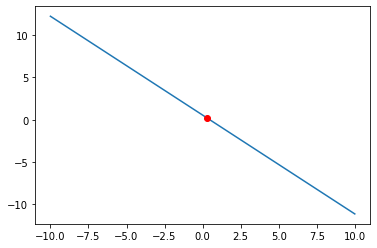

In [6]:
u = np.linspace(-10,10)
cq = np.cos(x0/R)
sq = np.sin(y0/R)
v = (-cq/sq)*u+(1/2/R/sq)
plt.plot(u,v)
u0=cq/2/R
v0 = sq/2/R
print(u0,v0)
plt.plot(u0,v0,'ro')